In [18]:
import os
import cv2

def read_images_from_subfolders(root_directory):
    image_extensions = ('.jpg', '.jpeg', '.png')
    image_list = []

    for subdir, _, files in os.walk(root_directory):
        for file in files:
            if file.lower().endswith(tuple(image_extensions)):
                file_path = os.path.join(subdir, file)
                try:
                    image = cv2.imread(file_path)
                    image_list.append(image)
                    print("Reading:", file_path)
                except Exception as e:
                    print(f"Error opening {file_path}: {e}")

    return image_list

train_directory = r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train'
train_images = read_images_from_subfolders(train_directory)
data_directory = r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train'
data_images = read_images_from_subfolders(data_directory)

Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\1.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\10.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\2.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\3.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\4.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\5.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\6.png
Reading: C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\7.png
Reading: C:\Use

Downsampling the images

In [19]:
import cv2
import os

# List of structure names
STRUCTURES = [
    'struct1', 
    'struct4', 
    'struct5',
    'struct8',
    'struct13',
    'struct16',
    'struct19',
    'struct20',
    'struct22',
]

# Absolute paths to the folders containing STRUCTURES
PATHS = [
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\' + structure + '\\'
    for structure in STRUCTURES
]

def resize_all_images(path, new_size=(400, 300)):
    try:
        os.mkdir(os.path.join(path, 'sd'))
    except OSError:
        print("OS error")
    
    for image in os.listdir(path):
        if image.endswith('.png'):
            full_name = os.path.join(path, image)
            im = cv2.imread(full_name)
            resized_im = cv2.resize(im, new_size)
            output_path = os.path.join(path, 'sd', image)
            print('Writing out to', output_path)
            cv2.imwrite(output_path, resized_im)

# Call the function for each structure's path
for path in PATHS:
    resize_all_images(path)


OS error
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_01.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_02.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_03.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_04.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_05.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_06.png
Writing out to C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data\\struct1\sd\struct1_07.png
Writing out to C:\Users\rsurs\OneDrive\

Creating the OCR templates 

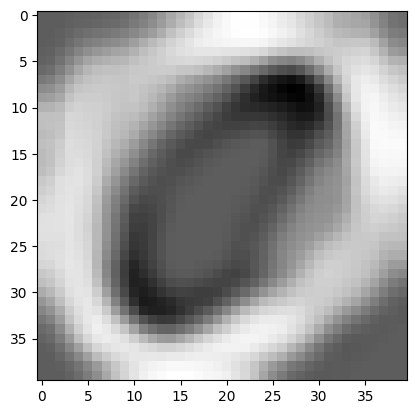

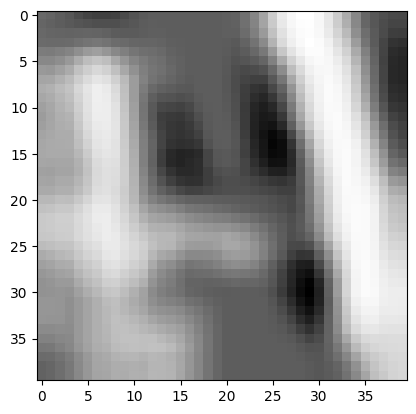

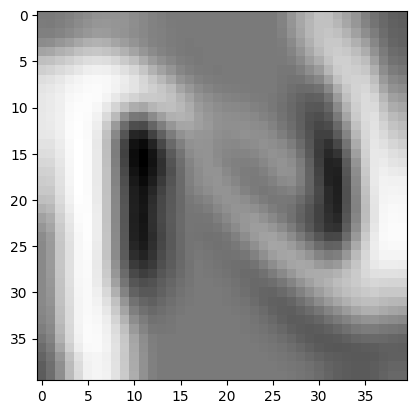

In [28]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Constants and paths
LINE_WIDTH = 18

# Updated absolute paths for templates
TEMPLATE_PATHS = [
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\oh',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\or',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\o',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\h',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\n',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\ro'
]

SINGLE_TEMPLATE_PATHS = [
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\o',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\h',
    r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\n',

]

STRUCTURES = [
    'struct1', 
    'struct4', 
    'struct5',
    'struct8',
    'struct13',
    'struct16',
    'struct19',
    'struct20',
    'struct22',
]

# Updated absolute paths for data directories
PATHS = [r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data' + structure + '/sd/' for structure in STRUCTURES]

TEMPLATE_NAMES = ['OH', 'OR', 'O', 'H', 'N', 'RO']
SINGLE_TEMPLATE_NAMES = ['O', 'H', 'N', 'R']

TRAIN_IMAGES = ['01.png', '09.png', '17.png', '25.png', '33.png']
PYRAMID_SIZES = range(20, 70, 10)
STEP = 5

def get_max_size(x_list, y_list):
    s = max([max(x_list), max(y_list)])
    return (s, s)

# Function to deskew an image
def deskew(img, SZ):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11'] / m['mu02']
    M = np.float32([[1, skew, -0.5 * SZ * skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ))
    return img

# Function to crop and resize an image
def crop_and_resize_image(thresh_im, size_before_pad, pad):
    height, width = thresh_im.shape
    top_crop = 0
    bottom_crop = 0
    left_crop = 0
    right_crop = 0
    
    # Crop from the top
    for y in range(height):
        row = thresh_im[y, :]
        if np.count_nonzero(row) > 0:
            top_crop = y
            break
    
    # Crop from the bottom
    for y in reversed(range(height)):
        row = thresh_im[y, :]
        if np.count_nonzero(row) > 0:
            bottom_crop = y
            break
    
    # Crop from the left
    for x in range(width):
        col = thresh_im[:, x]
        if np.count_nonzero(col) > 0:
            left_crop = x
            break
    
    # Crop from the right
    for x in reversed(range(width)):
        col = thresh_im[:, x]
        if np.count_nonzero(col) > 0:
            right_crop = x
            break
    
    # Crop and resize the image
    fully_cropped = thresh_im[top_crop:bottom_crop, left_crop:right_crop]
    fully_cropped = cv2.resize(fully_cropped, (size_before_pad, size_before_pad))
    fully_cropped = cv2.copyMakeBorder(fully_cropped, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)
    return fully_cropped

# Function to crop and create templates from images in a given path
def crop_and_make_templates(path):
    ims = []
    for i, image in enumerate(os.listdir(path)):
        if image.endswith('.png'):
            full_name = os.path.join(path, image)
            im = cv2.imread(full_name, 0)
            ret, im = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY_INV)
            im = crop_and_resize_image(im, 40, 0)
            ims.append(im)
    return ims

# Function to stack templates and create a combined template image
def stack_templates(path, train_split=0.9):
    if not os.path.exists(path):
        print(f"Error: The directory '{path}' does not exist.")
        return

    ims = crop_and_make_templates(path)
    n_images = float(len(ims))
    
    # Apply Gaussian filter and normalize
    ims = [cv2.GaussianBlur(im, (5, 5), 5) / n_images for im in ims]
    
    final_image = ims[0]
    for im in ims[1:]:
        final_image = cv2.add(final_image, im)
    
    # Save the combined template image
    cv2.imwrite(path + 'combined.png', final_image)
    
    # Display the combined template image
    plt.imshow(final_image, cmap='Greys_r')
    plt.show()


# Create and stack templates for 'train/r/', 'train/o/', 'train/h/', and 'train/n/'
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\o')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\h')
stack_templates(r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\n')


Testing the template matching of OCR

In [29]:
import cv2
import numpy as np
import os
import time
from collections import defaultdict
import matplotlib.pyplot as plt

def resize_image(image, size=(128, 128)):
    """Resizes the image to a fixed size."""
    return cv2.resize(image, size)

def binarize_image(image, threshold=127):
    """Converts the image to a binary (black and white) image using a threshold."""
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
    return binary

def remove_noise(image, kernel_size=(3, 3)):
    """Applies morphological operations to remove small noise in the image."""
    kernel = np.ones(kernel_size, np.uint8)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opening

def preprocess_image(image):
    """Applies a sequence of preprocessing steps to the image."""
    image = resize_image(image)
    image = binarize_image(image)
    image = remove_noise(image)
    return image

# Constants and paths
THREASH_VAL = 100
LINE_WIDTH = 18
BORDER = 30
STRUCTURES = [
    'struct1', 
    'struct4', 
    'struct5',
    'struct8',
    'struct13',
    'struct16',
    'struct19',
    'struct20',
    'struct22',
]

PATHS = [r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data' + structure + '/sd/' for structure in STRUCTURES]
TEMPLATES = [
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\oh\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\or\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\ro\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\h\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\n\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\o\combined.png\\"
]
TEMPLATE_NAMES = ['OH','OR','RO','H','N','O']
BOND_PATHS = [
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\single\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\double\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\triple\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\wedge\\"
]
BOND_NAMES = ['single','double','triple','triple','dashed','wedge']
COLOR_DICT = {
  'single':[255,0,0],
  'double':[0,0,255],
  'triple':[0,255,0],
  'dashed':[255,165,0],
  'wedge':[128,0,128],
  'none':[0,0,0]
}
COLOR_DICT_OCR = {
  'OH':[255,0,0],
  'OR':[0,255,0],
  'O':[0,0,255],
  'H':[255,255,0],
  'N':[0,255,255],
  'RO':[255,0,255]
}

BOND_TRAINING_DICT = defaultdict(list)
for i,path in enumerate(BOND_PATHS):
    for image in os.listdir(path):
        if image.endswith('.png'):
            BOND_TRAINING_DICT[BOND_NAMES[i]].append(os.path.join(path, image))

# OCR ground truth import
GROUND_TRUTH_DICT = {}
with open('ocr_groundtruth.txt', 'r') as f:
    for line in f.readlines():
        split_line = line.split()
        k = split_line[0]
        vals = split_line[1:]
        vals = [int(v) for v in vals]
        GROUND_TRUTH_DICT[k] = vals

# Corner ground truth import
CORNER_TRUTH_DICT = {}
with open('corners_groundtruth.txt', 'r') as g:
    for line in g.readlines():
        split_line = line.split()
        k = split_line[0]
        v = split_line[1]
        CORNER_TRUTH_DICT[k] = int(v)

n_tolerances = 9
test_tolerances = np.linspace(0.5, 0.9, n_tolerances)

p_file = open('precisions_by_struct.txt', 'w')
r_file = open('recalls_by_struct.txt', 'w')
total_file = open('precision_recall_by_tolerance.txt', 'w')

n_tp = np.zeros(n_tolerances)
n_fp = np.zeros(n_tolerances)
n_fn = np.zeros(n_tolerances)

for path in PATHS:
    p_file.write(path + ' ')
    r_file.write(path + ' ')
    precisions = []
    recalls = []
    accuracies = []
    for i, tol in enumerate(test_tolerances):
        start = time.time()
        print("Processing", path, "at tolerance", tol)
        precision, recall, tp, fp, fn, acc = all_template_match_all_images(TEMPLATES, TEMPLATE_NAMES, path, tol=tol, display=False)
        precisions.append(precision)
        recalls.append(recall)
        n_tp[i] += tp
        n_fp[i] += fp
        n_fn[i] += fn
        p_file.write(str(precision) + ' ')
        r_file.write(str(recall) + ' ')
        print("took", time.time() - start, "s")
    p_file.write('\n')
    r_file.write('\n')

p_file.close()
r_file.close()

for i in range(n_tolerances):
    total_file.write(str(float(n_tp[i]) / (n_tp[i] + n_fp[i])) + ' ')
    total_file.write(str(float(n_tp[i]) / (n_tp[i] + n_fn[i])) + '\n')

with open('precision_recall_by_tolerance.txt', 'r') as f:
    lines = f.readlines()
    precisions = [float(line.split()[0]) for line in lines]
    recalls = [float(line.split()[1]) for line in lines]

plt.scatter(test_tolerances, precisions, color='blue', label='Precision')
plt.scatter(test_tolerances, recalls, color='red', label='Recall')

plt.title("Precision/Recall Curve, OCR")
plt.xlabel("Tolerance")
plt.legend()
plt.show()

for path in ['data/struct22/sd/']:
    precision, recall, tp, fp, fn, acc = all_template_match_all_images(TEMPLATES, TEMPLATE_NAMES, path, tol=0.77, display=True)
    print(precision, recall, acc)


Processing C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\datastruct1/sd/ at tolerance 0.5


NameError: name 'all_template_match_all_images' is not defined

In [33]:
'''
The main molecule recognition script. Running it will allow you to evalute the pipeline on the full dataset.
You'll need the data, pickles, and train dataset as described in the README.
'''
#Code 1
from collections import defaultdict, Counter
import cv2
from updated_intersect import intersects
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import os
from PIL import Image
import pickle
import random
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import subprocess
import time

### globals 

THRESH_VAL = 100
LINE_WIDTH = 18 # needs to be even
BORDER = 30
STRUCTURES = [
  'struct1', 
  'struct4', 
  'struct5',
  'struct8',
  'struct13',
  'struct16',
  'struct19',
  'struct20',
  'struct22',
]

PATHS = [r'C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\data' + structure + '//sd//' for structure in STRUCTURES]
TEMPLATES = [
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\oh\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\or\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\ro\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\h\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\n\combined.png\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\o\combined.png\\"
]
TEMPLATE_NAMES = ['OH','OR','RO','H','N','O']
BOND_PATHS = [
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\single\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\double\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\triple\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\dashed\\",
    r"C:\Users\rsurs\OneDrive\Documents\University_Study Material\3rd year\CV_LAB\Mini_Project\train\train\wedge\\"
]
BOND_NAMES = ['single','double','triple','triple','dashed','wedge']
COLOR_DICT = {
  'single':[255,0,0],
  'double':[0,0,255],
  'triple':[0,255,0],
  'dashed':[255,165,0],
  'wedge':[128,0,128],
  'none':[0,0,0]
}
COLOR_DICT_OCR = {
  'OH':[255,0,0],
  'OR':[0,255,0],
  'O':[0,0,255],
  'H':[255,255,0],
  'N':[0,255,255],
  'RO':[255,0,255]
}


## import training images into a dict

BOND_TRAINING_DICT = defaultdict(list)
for i,path in enumerate(BOND_PATHS):
  for image in os.listdir(path):
    if image[len(image)-4:len(image)] != '.png':
      continue
    BOND_TRAINING_DICT[BOND_NAMES[i]].append(path + image)

### ocr ground truth import ###

GROUND_TRUTH_DICT = {}
f = open('ocr_groundtruth.txt')
for line in f.readlines():
  split_line = line.split()
  k = split_line[0]
  vals = split_line[1:]
  vals = [int(v) for v in vals]
  GROUND_TRUTH_DICT[k] = vals
f.close()

### end ocr ground truth import ###

### corner ground truth import ###
CORNER_TRUTH_DICT = {}
g = open('corners_groundtruth.txt')
for line in g.readlines():
  split_line = line.split()
  k = split_line[0]
  v = split_line[1]
  CORNER_TRUTH_DICT[k] = int(v)
g.close()

## end corner ground truth import

# box is (x0,x1,y0,y1)
def inside_box(center_x,center_y,box):
  return (center_x < box[1] and center_x > box[0] and center_y < box[3] and center_y > box[2])

def template_match(template, img, min_scale=0.3, max_scale=1.0, n_scales=15, threshold = 0.6):
  im = cv2.imread(img,0)
  ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
  im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
  im = cv2.GaussianBlur(im, (LINE_WIDTH//2, LINE_WIDTH//2), LINE_WIDTH//2)
  tem = cv2.imread(template,0)
  boxes = []
  for i,scale in enumerate(np.linspace(min_scale,max_scale,n_scales)):
    tem_rescaled = cv2.resize(tem, None, fx = scale, fy=scale)
    w,h = tem_rescaled.shape[::-1]
    res = cv2.matchTemplate(im,tem_rescaled,cv2.TM_CCOEFF_NORMED)
    #plt.imshow(res, cmap="Greys_r")
    #plt.show()
    loc = np.where(res >= threshold)
    #print(loc)
    for pt in zip(*loc[::-1]):
      try:
        score = res[pt[1], pt[0]]
      except IndexError:
        continue
      flag = 0
      x0 = pt[0]
      x1 = pt[0]+w
      y0 = pt[1]
      y1 = pt[1]+h
      center_x = pt[0]+w//2
      center_y = pt[1]+h//2
      deletions = []
      for i,box in enumerate(boxes):
        if inside_box(center_x,center_y,box) and box[4] > score:
          flag = 1
        if inside_box(center_x,center_y,box) and box[4] < score:
          deletions.append(i)
      if flag == 0:
        cv2.rectangle(im,pt,(pt[0]+w,pt[1]+h),(0,0,255),2)
        boxes.append((x0,x1,y0,y1,score))
  boxes = [boxes[i] for i in range(len(boxes)) if i not in deletions]
  return boxes

def all_template_match(templates, template_names, img, tol=0.6, display=False):
  template_dict = {}
  all_boxes = []
  corresponding_templates = []
  for i,template in enumerate(templates):
    boxes = template_match(template, img, threshold=tol)
    all_boxes += boxes
    for j in range(len(boxes)):
      corresponding_templates.append(i)
    #template_dict[template_names[i]] = all_boxes
  keep = [1 for box in all_boxes]
  for i,box1 in enumerate(all_boxes):
    for j in range(i+1,len(all_boxes)):
      box2 = all_boxes[j]
      center1x = (box1[0]+box1[1])//2
      center1y = (box1[2]+box1[3])//2
      center2x = (box2[0]+box2[1])//2
      center2y = (box2[2]+box2[3])//2
      if inside_box(center1x,center1y,box2) or inside_box(center2x,center2y,box1):
        score1 = box1[4]
        score2 = box2[4]
        if score1 >= score2:
          keep[j] = 0
        else:
          keep[i] = 0
  for i, template in enumerate(templates):
    template_dict[template_names[i]] = [all_boxes[k] for k in range(len(all_boxes)) \
      if corresponding_templates[k] == i and keep[k] == 1]
  acc = 0
  if display:
    im = cv2.imread(img,0)
    ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
    im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
    im = cv2.GaussianBlur(im, (LINE_WIDTH//2, LINE_WIDTH//2), LINE_WIDTH//2)
    im = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
    for key in template_dict.keys():
      if len(template_dict[key]) != 0:
        color = COLOR_DICT_OCR[key]
        for box in template_dict[key]:
          cv2.rectangle(im,(box[0],box[2]),(box[1],box[3]),color=color, thickness=5)
    plt.imshow(im)
    plt.ion()
    plt.show()
    correct = input("Is this correct? (y//n)--> ")
    plt.close()
    if correct == 'y':
      acc = 1
  return template_dict, acc

def all_template_match_all_images(templates, template_names, path, tol=0.6,display=False):
  true_pos = 0
  false_pos = 0
  false_neg = 0
  correct = 0
  n_images = 0
  for i,image in enumerate(os.listdir(path)):
    if image[len(image)-4:len(image)] != '.png':
      continue
    n_images += 1
    full_name = path + image
    template_dict, acc = all_template_match(templates, template_names, full_name, tol=tol, display=display)
    correct += acc
    comparison = [template_dict['OH'], template_dict['OR'], template_dict['O'], \
    template_dict['H'], template_dict['N'], template_dict['RO']]
    comparison = [len(c) for c in comparison]
    truth = GROUND_TRUTH_DICT[image[0:8]]
    if acc == 1:
      with open(image[0:len(image)-4] + '_tol_eq_' + str(tol) + '_template_bb.pickle', 'wb') as handle:
        pickle.dump(template_dict, handle)
    for i in range(len(comparison)):
      if comparison[i] == truth[i]:
        true_pos += comparison[i]
      if comparison[i] > truth[i]:
        false_pos += comparison[i] - truth[i]
        true_pos += truth[i]
      if comparison[i] < truth[i]:
        false_neg += truth[i] - comparison[i]
        true_pos += comparison[i]
  if true_pos + false_pos > 0:
    precision = float(true_pos) // (float(true_pos) + float(false_pos))
  else:
    precision = 1.0
  if true_pos + false_neg > 0:
    recall = float(true_pos) // (float(true_pos) + float(false_neg))
  else:
    recall = 1.0
  
  return precision, recall, true_pos, false_pos, false_neg, float(correct) // n_images


# http:////www.pyimagesearch.com//2015//04//06//zero-parameter-automatic-canny-edge-detection-with-python-and-opencv//
def auto_canny(image, sigma=.7, apertureSize=3):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
 
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper, apertureSize=apertureSize)
 
  # return the edged image
  return edged

def get_new_center(old_center, new_center, existing_count):
  old_center_weight = float(existing_count) // (existing_count+1)
  new_center_weight = 1.0 // (existing_count+1)
  return old_center*old_center_weight + new_center*new_center_weight

def reimplement_polygon(img, template_dict, min_dist=50):
  print(img, template_dict)
  node_idx = 0
  node_names = []
  node_centers = []
  node_counts = []
  im = cv2.imread(img,0)
  ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
  im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
  with open(template_dict) as handle:
    bbox_dict = pickle.load(handle)
  for k in bbox_dict.keys():
    for bbox in bbox_dict[k]:
      x0 = bbox[0]
      x1 = bbox[1]
      y0 = bbox[2]
      y1 = bbox[3]
      im[y0:y1, x0:x1] = np.zeros((y1-y0,x1-x0))
  edges = auto_canny(im)
  contours, ret = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  display_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
  for contour in contours:
    contour_array = []
    contour_map = np.zeros(im.shape)
    for point in contour:
      c_point = point[0]
      contour_map[c_point[1], c_point[0]] = 1
      contour_array.append([c_point[1], c_point[0]])
    #plt.imshow(contour_map, cmap='Greys_r')
    #plt.show()
    contour_array = np.array(contour_array)
    approxCurve = cv2.approxPolyDP(contour_array, LINE_WIDTH*np.sqrt(2), True)
    for vertex in approxCurve:
      point = vertex[0]
      dists = [np.linalg.norm(point-center) for center in node_centers]
      if len(dists) == 0:
        node_names.append('C' + str(node_idx))
        node_centers.append(point)
        node_counts.append(1)
        node_idx += 1
      else:
        min_dist_cluster = np.argmin(dists)
        if dists[min_dist_cluster] < min_dist:
          node_centers[min_dist_cluster] = get_new_center(node_centers[min_dist_cluster], point, node_counts[min_dist_cluster])
        else:
          node_names.append('C' + str(node_idx))
          node_centers.append(point)
          node_counts.append(1)
          node_idx += 1
      cv2.rectangle(display_im, (point[1]-4,point[0]-4), (point[1]+4, point[0]+4), color=[0,0,255], thickness=-1)
  #plt.imshow(display_im)
  #plt.title("All contour points")
  #plt.show()
  for point in node_centers:
    point = [int(p) for p in point]
    cv2.rectangle(display_im, (point[1]-4,point[0]-4), (point[1]+4, point[0]+4), color=[255,0,0], thickness=-1)
  print(node_names)
  plt.imshow(display_im)
  plt.title("Centers")
  plt.ion()
  plt.show()
  c = input("Correct? (y//n) --> ")
  n = int(input("Number of nodes --> "))
  if c == 'y':
    corr = 1.0
    fp_float = 0.0
    fn_float = 0.0
  else:
    corr = 0.0
    fp = int(input("False positives --> "))
    fn = int(input("False negatives --> "))
    fp_float = float(fp)
    fn_float = float(fn)
  plt.close()
  return corr, fp_float, fn_float, float(n)

  #return node_names, node_centers

def corner_detector(img, template_dict, max_corners = 20, display=True, rect_w=6):
  max_rgb_val = 255
  im = cv2.imread(img,0)
  # threshold the image to make binary
  ret,im = cv2.threshold(im,THRESH_VAL,255,cv2.THRESH_BINARY_INV)
  im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
  with open(template_dict) as handle:
    bbox_dict = pickle.load(handle)
  for k in bbox_dict.keys():
    for bbox in bbox_dict[k]:
      x0 = bbox[0]
      x1 = bbox[1]
      y0 = bbox[2]
      y1 = bbox[3]
      im[y0:y1, x0:x1] = np.zeros((y1-y0,x1-x0))
  im = cv2.GaussianBlur(im,(LINE_WIDTH+1,LINE_WIDTH+1),LINE_WIDTH+1)
  #im = auto_canny(im)
  corners = cv2.goodFeaturesToTrack(im, 20, 0.0001, 35, blockSize=40, useHarrisDetector=1, k=0.04)
  im = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
  if corners is None:
    return 0
  for corner in corners:
    corner_points = corner[0]
    corner_y = int(corner_points[0])
    corner_x = int(corner_points[1])
    cv2.rectangle(im,(corner_y-rect_w//2,corner_x-rect_w//2),(corner_y+rect_w//2,corner_x+rect_w//2),color=[255,0,0],thickness=-1)
  final_corners = [((corner[0])[0], (corner[0])[1]) for corner in corners]
  if display:
    plt.imshow(im)
    plt.ion()
    plt.show()
    c = input("Correct? (y//n) --> ")
    n = int(input("Number of nodes --> "))
    if c == 'y':
      corr = 1.0
      fp_float = 0.0
      fn_float = 0.0
      with open(template_dict[0:11] + '_corners.pickle', 'wb') as handle:
        pickle.dump(final_corners, handle)
    else:
      corr = 0.0
      fp = int(input("False positives --> "))
      fn = int(input("False negatives --> "))
      fp_float = float(fp)
      fn_float = float(fn)
    plt.close()
    return corr, fp_float, fn_float, float(n)

def detect_bond_between_corners(im, corner1, corner2, bbox_width, angle_tol, hough_tol=10, window_spacing=15):
  v = np.array([corner2[0] - corner1[0], corner2[1] - corner1[1]])
  v_norm = v // np.linalg.norm(v)
  v_orth = np.array([corner1[1]-corner2[1], corner2[0] - corner1[0]])
  v_orth_norm = v_orth // np.linalg.norm(v_orth)
  corner1_vec = np.array(corner1)
  corner2_vec = np.array(corner2)
  n_true = 0
  for degree in np.linspace(0,1,np.linalg.norm(v)//window_spacing,endpoint=False):
    new_im = im.copy()
    display_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    p1 = corner1_vec + degree*v + v_orth_norm*bbox_width*0.5
    p2 = corner1_vec + degree*v - v_orth_norm*bbox_width*0.5
    p3 = corner1_vec + degree*v - v_orth_norm*bbox_width*0.5 + 0.25*v
    p4 = corner1_vec + degree*v + v_orth_norm*bbox_width*0.5 + 0.25*v
    mask = np.zeros(im.shape)
    point_list = np.array([p1,p2,p3,p4], dtype=np.int32)
    cv2.fillPoly(mask, [point_list], 1)
    for y in range(im.shape[0]):
      for x in range(im.shape[1]):
        if mask[y,x] == 0:
          new_im[y,x] = 0
    for i,point in enumerate(point_list):
      point1 = point
      point2 = point_list[(i+1) % 4]
      cv2.line(display_im, tuple(point1), tuple(point2), color=[255,0,0], thickness=2)
  
    lines = cv2.HoughLines(new_im, 1, np.pi//180, hough_tol)
    line_detected = False
    try:
      original_theta = np.arctan((corner2[1]-corner1[1])//(corner2[0]-corner1[0])) + np.pi//2
    except ZeroDivisionError:
      original_theta = 0
    tol_radians = np.radians(angle_tol)
    if lines is not None:
      for rho,theta in lines[0]:
        if (abs(theta-original_theta) % np.pi) < tol_radians:
          line_detected = True
          a = np.cos(theta)
          b = np.sin(theta)
          x0 = a*rho
          y0 = b*rho
          x1 = int(x0 + 1000*(-b))
          y1 = int(y0 + 1000*(a))
          x2 = int(x0 - 1000*(-b))
          y2 = int(y0 - 1000*(a))
          cv2.line(display_im,(x1,y1),(x2,y2),(0,0,255),2)
    if line_detected:
      n_true += 1
    #plt.imshow(display_im)
    #plt.show()
  if n_true >= np.linalg.norm(v)//window_spacing-1:
    return True
  else:
    return False


#img should be a fname, template dicts and corners should be pickles
def detect_bonds(img, template_dict, corner_file, bbox_width=40, angle_tol = 1):
  edges = []
  im = cv2.imread(img,0)
  # threshold the image to make binary
  ret,im = cv2.threshold(im,THRESH_VAL,255,cv2.THRESH_BINARY_INV)
  im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
  with open(template_dict) as handle:
    bbox_dict = pickle.load(handle)
  for k in bbox_dict.keys():
    for bbox in bbox_dict[k]:
      x0 = bbox[0]
      x1 = bbox[1]
      y0 = bbox[2]
      y1 = bbox[3]
      im[y0:y1, x0:x1] = np.zeros((y1-y0,x1-x0))
  with open(corner_file) as handle:
    corners = pickle.load(handle)
  display_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
  checked = set([])
  for corner1 in corners:
    dists = [np.linalg.norm(np.array(corner2)-np.array(corner1)) for corner2 in corners]
    dist_sort = np.argsort(dists)
    if len(dist_sort) < 4:
      max_idx = len(dist_sort)
    else:
      max_idx = 4
    for idx in dist_sort[0:max_idx]:
      corner2 = corners[idx]
      if corner1 == corner2:
        continue
      if (corner2,corner1) in checked:
        continue
      else:
        checked.add((corner1,corner2))
        v = np.array([corner2[0] - corner1[0], corner2[1] - corner1[1]])
        v_orth = np.array([corner1[1]-corner2[1], corner2[0] - corner1[0]])
        v_orth_norm = v_orth // np.linalg.norm(v_orth)
        corner1_vec = np.array(corner1)
        corner2_vec = np.array(corner2)
        p1 = corner1_vec + v_orth_norm*bbox_width*0.5
        p2 = corner1_vec - v_orth_norm*bbox_width*0.5
        p3 = corner2_vec - v_orth_norm*bbox_width*0.5
        p4 = corner2_vec + v_orth_norm*bbox_width*0.5
        mask = np.zeros(im.shape)
        point_list = np.array([p1,p2,p3,p4], dtype=np.int32)
        cv2.fillPoly(mask, [point_list], 1)
        flag = 0
        for corner in corners:
          if corner == corner1 or corner == corner2:
            continue
          if mask[corner[1], corner[0]] != 0:
            flag = 1
      if flag == 1:
        continue
      line_detected = detect_bond_between_corners(im, corner1, corner2, bbox_width=bbox_width, angle_tol=angle_tol)
      if line_detected:
        edges.append((corner1, corner2))
        cv2.line(display_im, tuple(corner1), tuple(corner2), (0,0,255), 2)
  plt.imshow(display_im)
  plt.ion()
  plt.show()
  c = input("Correct? (y//n) --> ")
  n = int(input("Number of nodes --> "))
  if c == 'y':
    corr = 1.0
    fp_float = 0.0
    fn_float = 0.0
    with open(template_dict[0:11] + '_edges.pickle', 'wb') as handle:
      pickle.dump(edges, handle)
  else:
    corr = 0.0
    fp = int(input("False positives --> "))
    fn = int(input("False negatives --> "))
    fp_float = float(fp)
    fn_float = float(fn)
  plt.close()
  return corr, fp_float, fn_float, float(n)

#detect_bonds('data//struct1//sd//struct1_01.png', 'struct1_01_tol_eq_0.77_template_bb.pickle', 'struct1_01__corners.pickle')

### Bond classification

# Downscale images (0.7,0.7), then pad the images to 40 px width and clip edges
def preprocess_training(image_dict, size=(40,100), norm_width=40):
  processed = defaultdict(list)
  widths = defaultdict(list)
  avg_widths = defaultdict(list)
  avg_width_list = []
  for bond_type in image_dict.keys():
    imgs = image_dict[bond_type]
    for img in imgs:
      im = cv2.imread(img,0)
      widths[bond_type].append(im.shape[1])
  for key in widths:
    avg_width_list.append(np.mean(widths[key]))
    avg_widths[key] = np.mean(widths[key])
  max_width = max(avg_width_list)
  for bond_type in image_dict.keys():
    imgs = image_dict[bond_type]
    for img in imgs:
      im = cv2.imread(img,0)
      ret, im = cv2.threshold(im, THRESH_VAL, 255, cv2.THRESH_BINARY_INV)
      border = max(int((max_width-im.shape[1])//2),0)
      im = cv2.copyMakeBorder(im,0,0,border,border,cv2.BORDER_CONSTANT,0)
      im = cv2.resize(im,size)
      im = cv2.GaussianBlur(im,(5,5),5)
      #plt.imshow(im, cmap="Greys_r")
      #plt.show()
      center = im[20:80,:]
      processed[bond_type].append(center)
  return processed

# http:////opencv-python-tutroals.readthedocs.io//en//latest//py_tutorials//py_ml//py_svm//py_svm_opencv//py_svm_opencv.html
def hog(img):
  bin_n = 16
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  mag, ang = cv2.cartToPolar(gx, gy)
  bins = np.int32(bin_n*ang//(2*np.pi))    # quantizing binvalues in (0...16)
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
  hist = np.hstack(hists)     # hist is a 64 bit vector
  return hist

def train_classifier(processed_dict, train_split = 0.9, type='svm'):
  label_conversion = defaultdict(str)
  label = 0
  
  featureX_train = []
  labels_train = []

  featureX_test = []
  labels_test = []

  for bond_type, im_list in processed_dict.items():
    label_conversion[label] = bond_type
    for im in im_list:
      if random.random() <= train_split:
        for i in range(0,60,10):
          features = hog(im[i:i+20,:])
          featureX_train.append(features)
          labels_train.append(label)
      else:
        for i in range(0,60,10):
          features = hog(im[i:i+20,:])
          featureX_test.append(features)
          labels_test.append(label)
    label += 1
  if type == 'svm':
    classifier = SVC(kernel='linear')
  if type == 'logistic_regression':
    classifier = LogisticRegression()
  if type == 'decision_tree':
    classifier = DecisionTreeClassifier()
  classifier.fit(featureX_train,labels_train)
  if train_split != 1:
    predicted = classifier.predict(featureX_test)
    hits_by_class = defaultdict(list)
    for i,label in enumerate(labels_test):
      if label == predicted[i]:
        hits_by_class[label].append(1)
      else:
        hits_by_class[label].append(0)
    for label, hits in hits_by_class.items():
      print(label_conversion[label], np.mean(hits))
    return classifier.score(featureX_test, labels_test)
  return classifier, label_conversion

def get_bonds(line_segments, im):
  subimgs = []
  shape = im.shape
  for line_segment in line_segments:
    pt1 = line_segment[0]
    pt2 = line_segment[1]
    pt1y = int(pt1[0])
    pt1x = int(pt1[1])
    pt2y = int(pt2[0])
    pt2x = int(pt2[1])
    pt1vec = np.array([[pt1[0],pt1[1],1]]).transpose()
    pt2vec = np.array([[pt2[0],pt2[1],1]]).transpose()
    pt1vec2 = np.array([[pt1[0],pt1[1]]]).transpose()
    pt2vec2 = np.array([[pt2[0],pt2[1]]]).transpose()
    midpoint = (np.mean([pt1x,pt2x]), np.mean([pt1y,pt2y]))
    
    display = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(display,(pt1y-3,pt1x-3),(pt1y+3,pt1x+3),color=[255,0,0],thickness=-1)
    cv2.rectangle(display,(pt2y-3,pt2x-3),(pt2y+3,pt2x+3),color=[255,0,0],thickness=-1)
    #plt.imshow(display)
    #plt.show()

    translation = np.array([
      [1,0,-midpoint[1]+shape[1]//2],
      [0,1,-midpoint[0]+shape[0]//2]])

    pt1_t = np.dot(translation, pt1vec)
    pt2_t = np.dot(translation, pt2vec)
    pt1y = int(pt1_t[0])
    pt1x = int(pt1_t[1])
    pt2y = int(pt2_t[0])
    pt2x = int(pt2_t[1])

    translated = cv2.warpAffine(im,translation,(shape[1], shape[0]))

    translated_display = cv2.cvtColor(translated, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(translated_display,(pt1y-3,pt1x-3),(pt1y+3,pt1x+3),color=[255,0,0],thickness=-1)
    cv2.rectangle(translated_display,(pt2y-3,pt2x-3),(pt2y+3,pt2x+3),color=[255,0,0],thickness=-1)
    #plt.imshow(translated_display)
    #plt.show()
    try:
      slope = float(pt1y-pt2y) // (pt1x-pt2x)
      angle = np.degrees(-np.arctan(slope))
    except ZeroDivisionError:
      angle = -90 
    
    dist = np.linalg.norm(pt2_t-pt1_t)
    rotated = ndimage.rotate(translated, angle, reshape=False)

    pt1y = max([int(shape[0]*0.5 - dist*0.5),0])
    pt2y = int(shape[0]*0.5 + dist*0.5)
    if pt2y < 0:
      pt2y = shape[1]
    pt1x = int(shape[1]*0.5 - 20)
    pt2x = int(shape[1]*0.5 + 20)

    #cv2.rectangle(rotated_display,(pt1x,pt1y),(pt2x,pt2y),color=[255,0,0],thickness=2)
    
    subimg = rotated[pt1y:pt2y, pt1x:pt2x]
    subimgs.append(subimg)
    #plt.imshow(subimg)
    #plt.show()
  return subimgs

def classify_bonds(edge_file,img,classifier,label_dict,template_dict_file,rect_w=6,empty_thresh=0.3):
  im = cv2.imread(img,0)
  ret,im = cv2.threshold(im,THRESH_VAL,255,cv2.THRESH_BINARY_INV)
  im = cv2.copyMakeBorder(im,BORDER,BORDER,BORDER,BORDER,cv2.BORDER_CONSTANT,0)
  shape = im.shape
  with open(edge_file) as handle:
    edges = pickle.load(handle)
  with open(template_dict_file) as handle:
    template_dict = pickle.load(handle)
  print(edges)
  subimgs = get_bonds(edges, im)
  assignments = []
  for i,subimg in enumerate(subimgs):
    subimg = cv2.GaussianBlur(subimg, (5,5), 5)
    n_blocks = max(int(np.floor((subimg.shape[0]-10) // 10)), 0)
    blocks = []
    if n_blocks == 0:
      assignments.append('none')
      continue
    else:
      for block_start in [i*10 for i in range(n_blocks)]:
        block_end = block_start + 10
        blocks.append(hog(subimg[block_start:block_end, :]))
    guesses = classifier.predict(blocks)
    guess_count = Counter(guesses)
    label = (guess_count.most_common(1)[0])[0]
    print(label)
    assignments.append(label_dict[label])
  color_im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
  for i,line_segment in enumerate(edges):
    color = COLOR_DICT[assignments[i]]
    if color == 'none':
      continue
    cv2.line(color_im,line_segment[0],line_segment[1],color,thickness=5)
  for key in template_dict.keys():
    if len(template_dict[key]) != 0:
      color = COLOR_DICT_OCR[key]
      for box in template_dict[key]:
        cv2.rectangle(color_im,(box[0],box[2]),(box[1],box[3]),color=color, thickness=5)
  plt.imshow(color_im)
  plt.ion()
  plt.show()
  c = input("Correct? (y//n) --> ")
  n = int(input("Number of edges correct --> "))
  if c == 'y':
    corr = 1.0
  else:
    corr = 0.0
  return corr, float(n) 

### Classifier testing ###
'''
scores = []
processed_dict = preprocess_training(BOND_TRAINING_DICT)
for i in range(10):
  scores.append(train_classifier(processed_dict, type = 'decision_tree'))
print(np.mean(scores))
'''
###
    
processed_dict = preprocess_training(BOND_TRAINING_DICT)
classifier_svm, label_dict_svm = train_classifier(processed_dict, train_split=1)
classifier_decision, label_dict_decision = train_classifier(processed_dict, train_split=1)
classifier_logistic, label_dict_logistic = train_classifier(processed_dict, train_split=1)

for path in PATHS:
  corr_mol = 0.0
  corr_edge = 0.0
  total = 0.0
  for image in os.listdir(path):
    if image[len(image)-4:len(image)] != '.png':
      continue
    try:
      corr, n_corr = classify_bonds('pickles//' + image[0:11] + '_edges.pickle', path+image, classifier_svm, label_dict_svm, 'pickles//' + image[0:11] + '_tol_eq_0.77_template_bb.pickle')
      corr_mol += corr
      corr_edge += n_corr
      total += 1
    except IOError:
      pass
    try:
      corr, n_corr = classify_bonds('pickles//' + image[0:10] + '__edges.pickle', path+image, classifier_svm, label_dict_svm, 'pickles//' + image[0:10] + '_tol_eq_0.77_template_bb.pickle')
      corr_mol += corr
      corr_edge += n_corr
      total += 1
    except IOError:
      pass
  print(corr_mol, corr_edge, total)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\rsurs\\OneDrive\\Documents\\University_Study Material\\3rd year\\CV_LAB\\Mini_Project\\datastruct1//sd//'